# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

**Task:**

Ames, lowa에 있는 집값을 예측하는 것이 최종 목표.
침실의 수, 수영장 면적, 차고 크기 등 보다 세부적인 요소들이 집값에 미치는 영향력을 파악하여 정확한 Saleprice를 예측하는것이 목표


**Datasets**

* Train&Validation dataset: 1460개의 Train Dataset

* Test dataset: 1460개의 Test Dataset

초기 competetion에서 제공해준 데이터에는 train 1460, test 1460개의 데이터가 존재하지만, one hot encoding과정에서 test, train의 데이터가 서로 다르게 encoding 되는현상이 발생해서, 두 데이터를 합쳐 encoding 진행 후 40:30:30 (Train, Validation, Test)로 프로젝트를 진행


**Features(x):**

37 Numerical Data and 43Categorical Data 



**Target(y):**

SalePrice: the property's sale price in dollars.

...

## Build Your Model

### Data preprocessing

In [877]:
## codes 
## check working directory 
import pandas as pd
import numpy as np
import os
os.getcwd()

'C:\\Users\\user\\Desktop\\Data\\KTG\\수강한강의내용\\2023머신러닝\\Midterm_project'

In [878]:
## load train & test data
tr_data = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv", sep=',', encoding='euc-kr')
te_data = pd.read_csv("./house-prices-advanced-regression-techniques/test.csv", sep=',', encoding='euc-kr')
tr_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [879]:
te_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.0525
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.3940
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.6836
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.4775
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.0800


In [880]:
## data merge
data = pd.concat([tr_data,te_data], ignore_index=True) # index rebuild
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [881]:
## remove id index
data = data.drop('Id', axis=1)

In [866]:
## check data columns dtype
for i in data.columns:
    if data[i].isnull().sum() != 0:
        print(i + ":",data[i].dtypes, data[i].isnull().sum())

## Na is No  -> Nan to NA class
##data already had NA class: Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu,GarageType, 
##                          GarageFinish, GarageQual,GarageCond, PoolQC, Fence, MiscFeature

## Na is missing value -> remove, if NA count < 100 columns remove row, else remove columns (LotFrontage, GarageYrBlt)
## MSZoning, LotFrontage, Utilities, MasVnrtype, Exterior1st, Exterior2nd, MasVnrArea, Electrical, GarageYrBlt, BsmtFinSF1, 
## BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, KitchenQual, Functional, GarageCars, GarageArea, SaleType

MSZoning: object 4
LotFrontage: float64 486
Alley: object 2721
Utilities: object 2
Exterior1st: object 1
Exterior2nd: object 1
MasVnrType: object 24
MasVnrArea: float64 23
BsmtQual: object 81
BsmtCond: object 82
BsmtExposure: object 82
BsmtFinType1: object 79
BsmtFinSF1: float64 1
BsmtFinType2: object 80
BsmtFinSF2: float64 1
BsmtUnfSF: float64 1
TotalBsmtSF: float64 1
Electrical: object 1
BsmtFullBath: float64 2
BsmtHalfBath: float64 2
KitchenQual: object 1
Functional: object 2
FireplaceQu: object 1420
GarageType: object 157
GarageYrBlt: float64 159
GarageFinish: object 159
GarageCars: float64 1
GarageArea: float64 1
GarageQual: object 159
GarageCond: object 159
PoolQC: object 2909
Fence: object 2348
MiscFeature: object 2814
SaleType: object 1


In [882]:
## LtoFrontage, GarageYrBlt is many missing value, so remove. 
data = data.drop('LotFrontage', axis=1)
data = data.drop('GarageYrBlt', axis=1)

In [883]:
## columns that little missing value, so remove row that has missing value
data = data.dropna(subset=['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd','Electrical',
                             'MasVnrType', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                                'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
                                  'GarageCars', 'GarageArea', 'SaleType'], how='any', axis=0)

In [884]:
##check data processing
for i in data.columns:
    if data[i].isnull().sum() != 0:
        print(i + ":",data[i].dtypes, data[i].isnull().sum())

Alley: object 2687
BsmtQual: object 76
BsmtCond: object 77
BsmtExposure: object 77
BsmtFinType1: object 74
BsmtFinType2: object 75
FireplaceQu: object 1401
GarageType: object 155
GarageFinish: object 156
GarageQual: object 156
GarageCond: object 156
PoolQC: object 2872
Fence: object 2313
MiscFeature: object 2778


In [885]:
## categorical data that have NA class. when data load, NA class change np.NAN, so change value
data = data.replace(np.NaN, "NA")

In [886]:
## missing data check
for i in data.columns:
    if data[i].isnull().sum() != 0:
        print(i + ":",data[i].dtypes, data[i].isnull().sum())

In [887]:
data.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0
1,20,RL,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0
2,60,RL,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0
3,70,RL,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0
4,60,RL,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0


In [888]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2882 entries, 0 to 2918
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2882 non-null   int64  
 1   MSZoning       2882 non-null   object 
 2   LotArea        2882 non-null   int64  
 3   Street         2882 non-null   object 
 4   Alley          2882 non-null   object 
 5   LotShape       2882 non-null   object 
 6   LandContour    2882 non-null   object 
 7   Utilities      2882 non-null   object 
 8   LotConfig      2882 non-null   object 
 9   LandSlope      2882 non-null   object 
 10  Neighborhood   2882 non-null   object 
 11  Condition1     2882 non-null   object 
 12  Condition2     2882 non-null   object 
 13  BldgType       2882 non-null   object 
 14  HouseStyle     2882 non-null   object 
 15  OverallQual    2882 non-null   int64  
 16  OverallCond    2882 non-null   int64  
 17  YearBuilt      2882 non-null   int64  
 18  YearRemo

In [889]:
## data rows
data_rows = len(data)
data_rows

2882

In [890]:
## numerous type data scaling
from sklearn.preprocessing import LabelEncoder
import copy

In [891]:
data_dummy = copy.deepcopy(data)
ecd = LabelEncoder()
for i in data:
    if data[i].dtypes == "object":
        ecd.fit(data[i])
        data[i] = ecd.transform(data[i])


array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'MSZoning'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'Street'}>,
        <AxesSubplot:title={'center':'Alley'}>,
        <AxesSubplot:title={'center':'LotShape'}>,
        <AxesSubplot:title={'center':'LandContour'}>,
        <AxesSubplot:title={'center':'Utilities'}>,
        <AxesSubplot:title={'center':'LotConfig'}>],
       [<AxesSubplot:title={'center':'LandSlope'}>,
        <AxesSubplot:title={'center':'Neighborhood'}>,
        <AxesSubplot:title={'center':'Condition1'}>,
        <AxesSubplot:title={'center':'Condition2'}>,
        <AxesSubplot:title={'center':'BldgType'}>,
        <AxesSubplot:title={'center':'HouseStyle'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
      

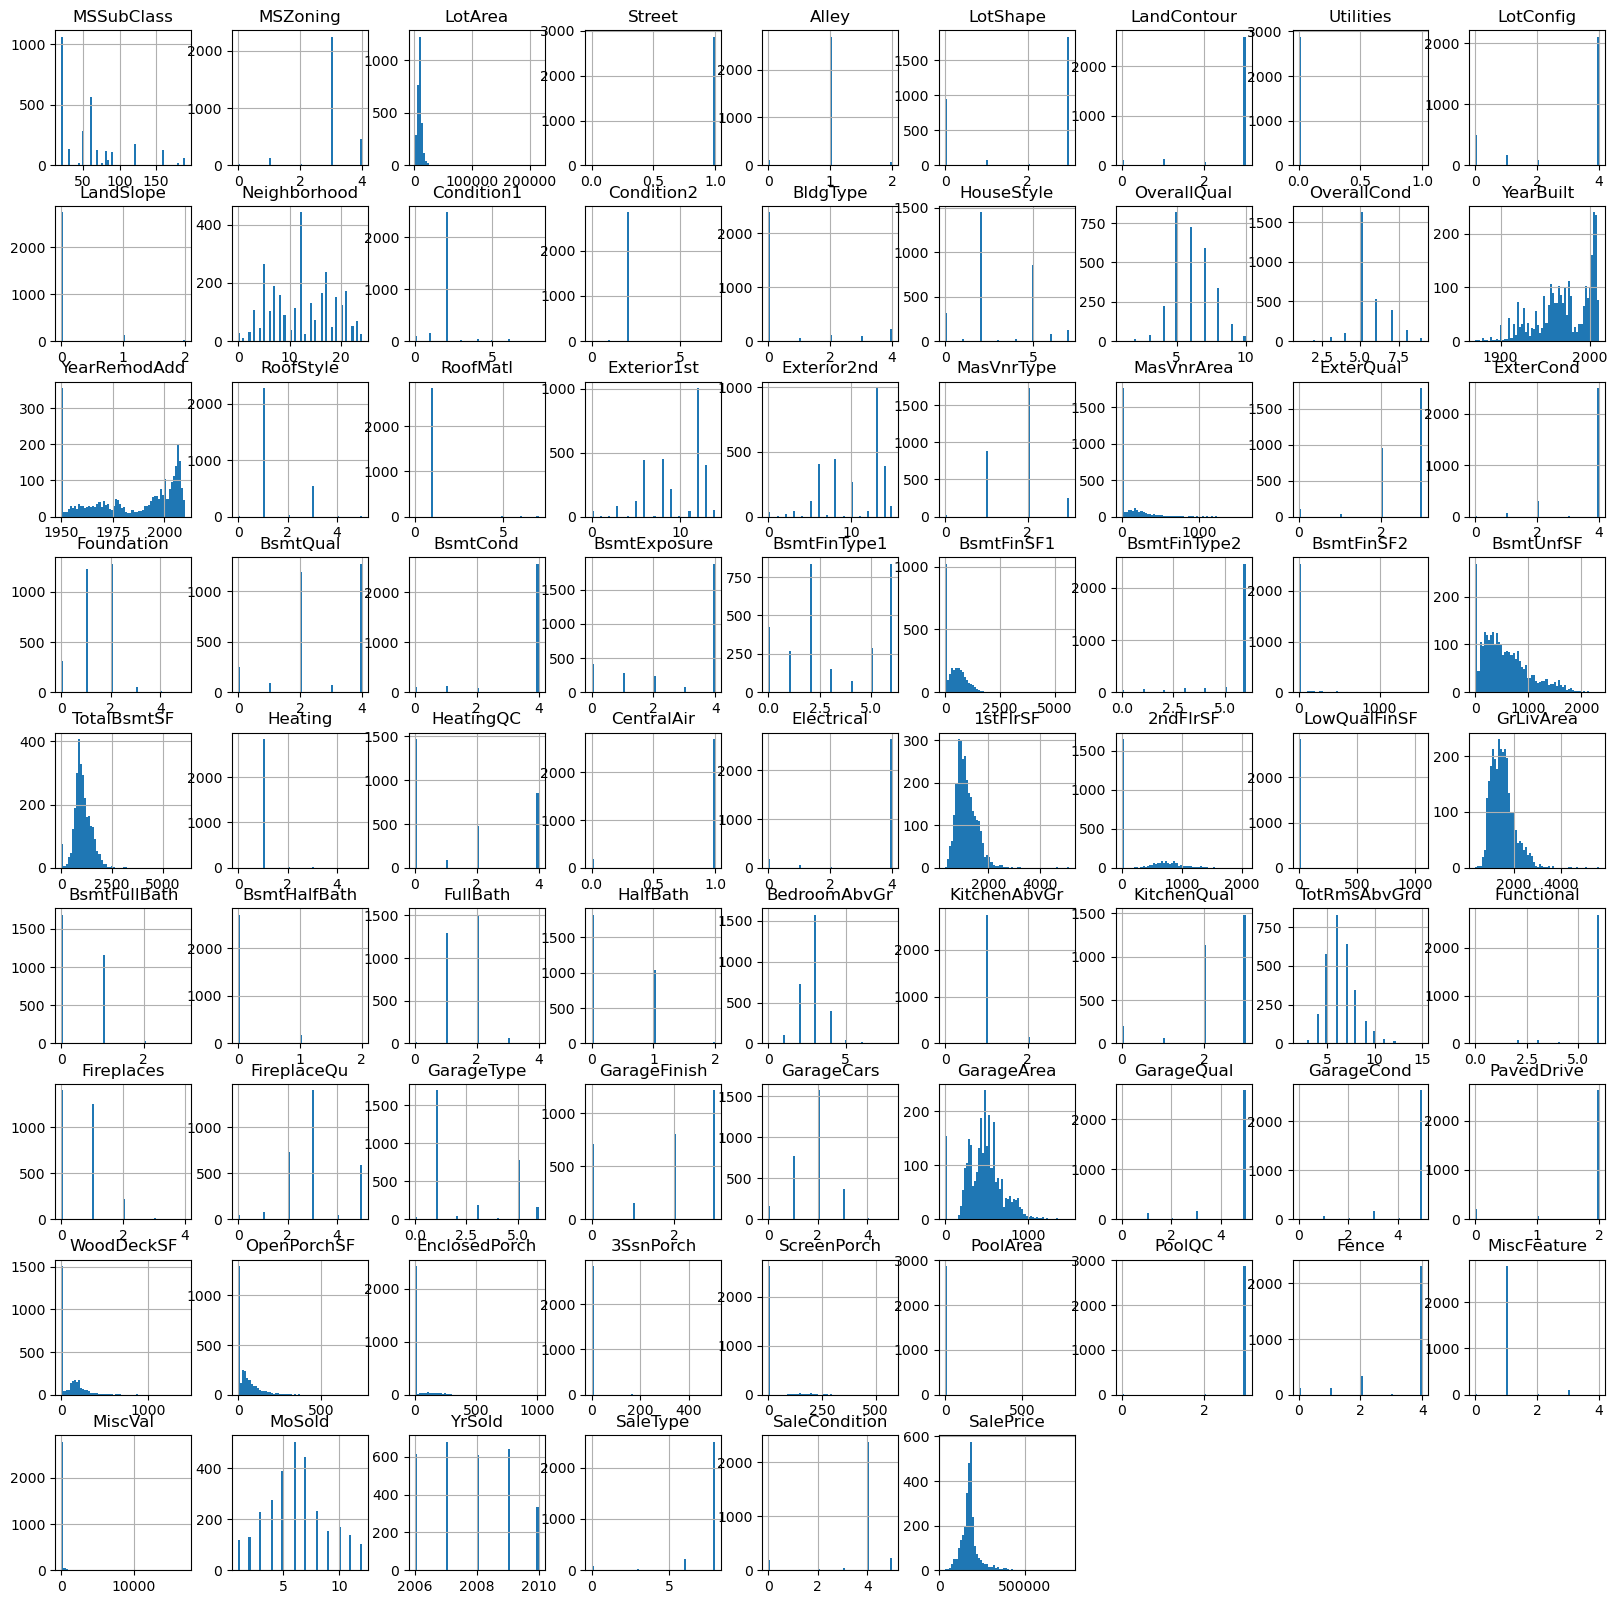

In [892]:
data.hist(bins=60, figsize=(20,20))

In [697]:
## Remove trash data 
for i in data.columns:
    if 2000 <= data[i].value_counts().to_frame()[i].iloc[0]:
        print(i)
        data = data.drop(i, axis=1)

MSZoning
Street
Alley
LandContour
Utilities
LotConfig
LandSlope
Condition1
Condition2
BldgType
RoofStyle
RoofMatl
ExterCond
BsmtCond
BsmtFinType2
BsmtFinSF2
Heating
CentralAir
Electrical
LowQualFinSF
BsmtHalfBath
KitchenAbvGr
Functional
GarageQual
GarageCond
PavedDrive
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
SaleType
SaleCondition


array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'LotShape'}>,
        <AxesSubplot:title={'center':'Neighborhood'}>,
        <AxesSubplot:title={'center':'HouseStyle'}>,
        <AxesSubplot:title={'center':'OverallQual'}>],
       [<AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'Exterior1st'}>,
        <AxesSubplot:title={'center':'Exterior2nd'}>,
        <AxesSubplot:title={'center':'MasVnrType'}>],
       [<AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'ExterQual'}>,
        <AxesSubplot:title={'center':'Foundation'}>,
        <AxesSubplot:title={'center':'BsmtQual'}>,
        <AxesSubplot:title={'center':'BsmtExposure'}>,
        <AxesSubplot:title={'center':'BsmtFinType1'}>],
       [<AxesSubplot:title={'center':'Bs

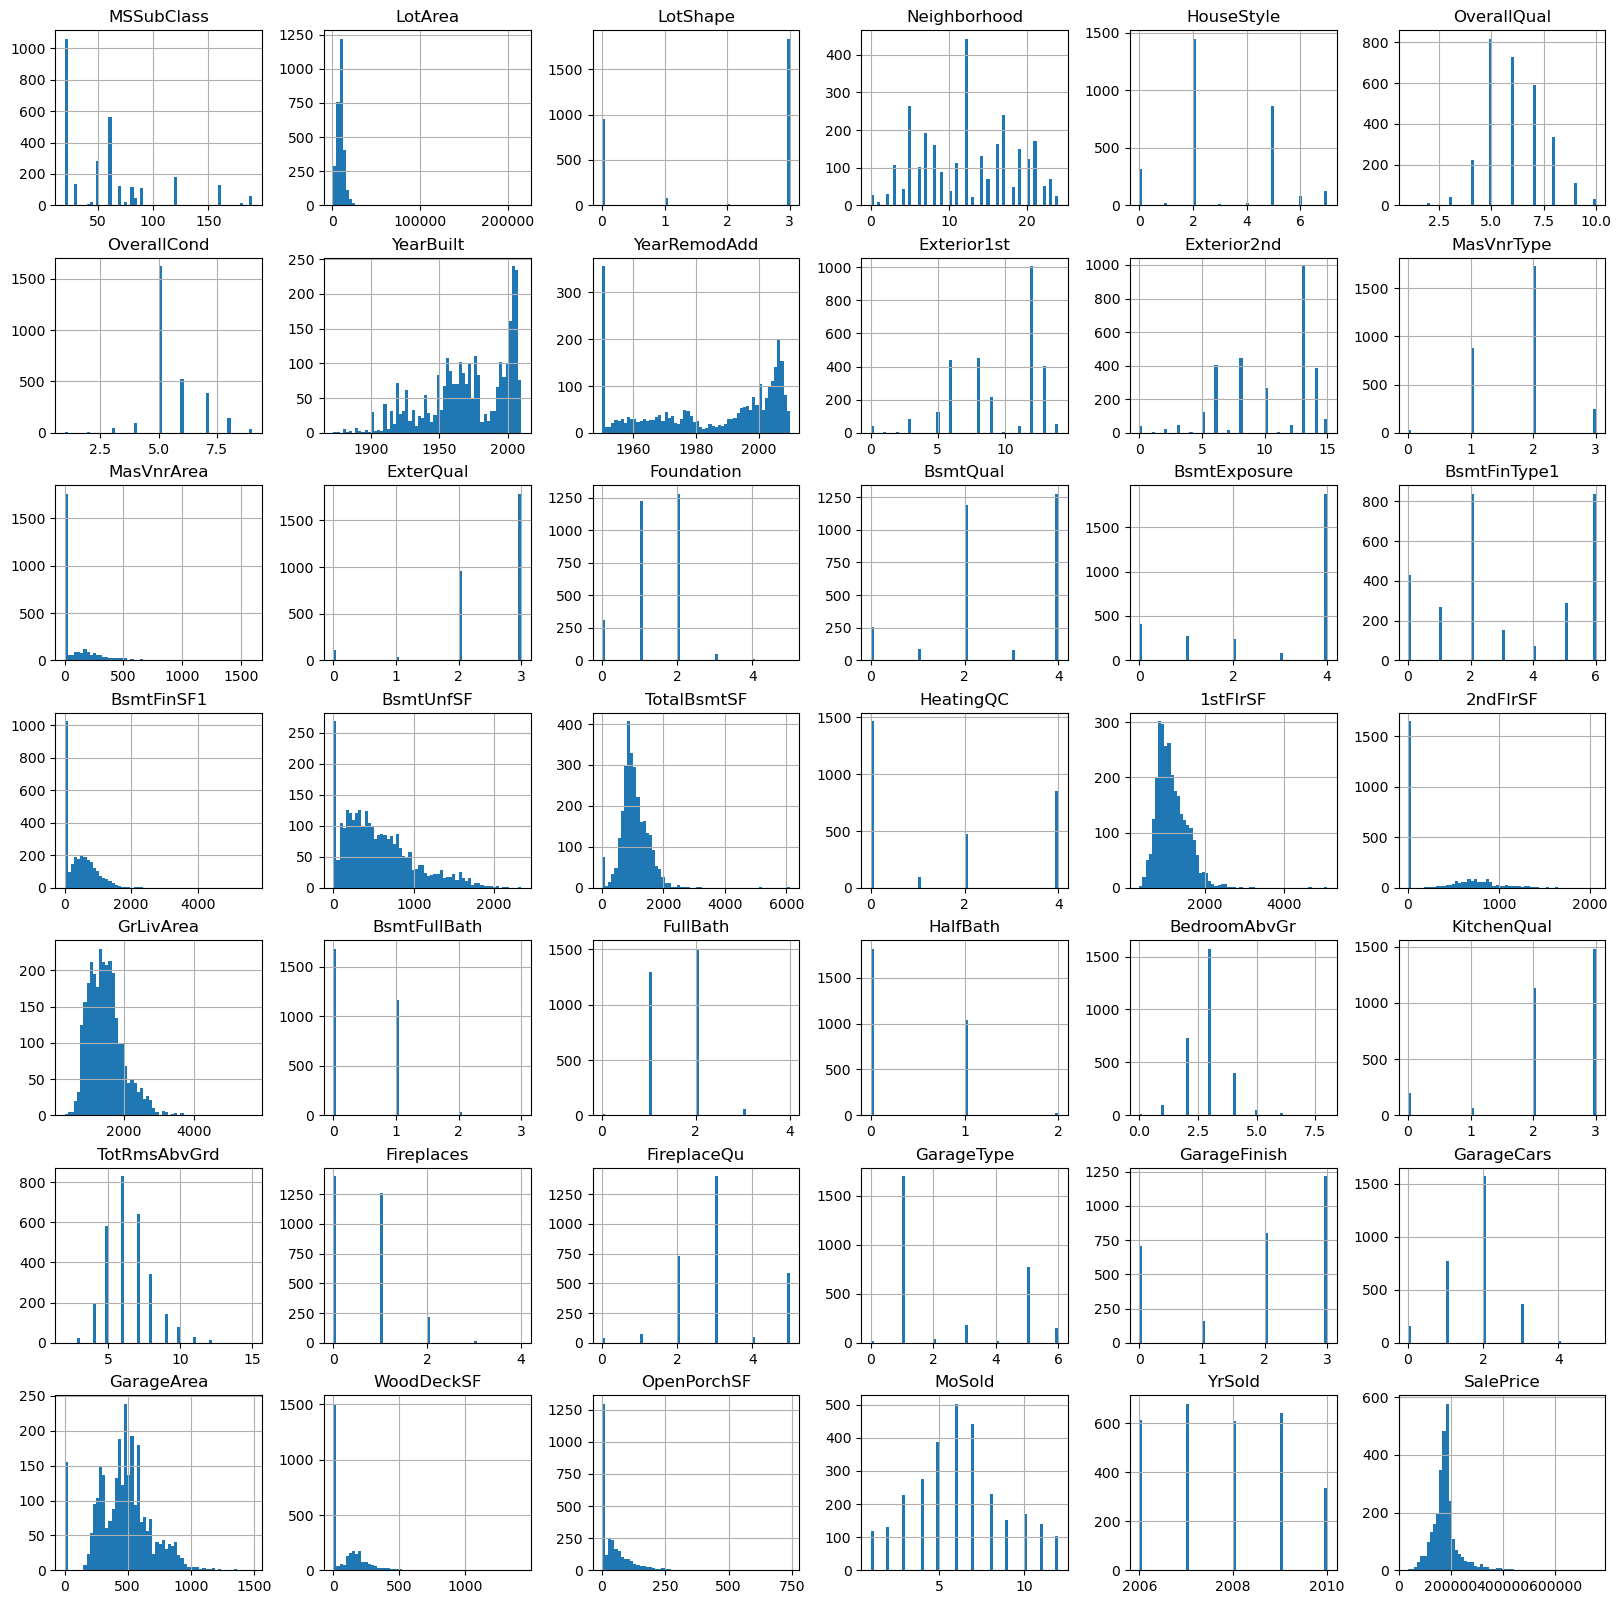

In [698]:
data.hist(bins=60, figsize=(20,20))

In [893]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2882 entries, 0 to 2918
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2882 non-null   int64  
 1   MSZoning       2882 non-null   int32  
 2   LotArea        2882 non-null   int64  
 3   Street         2882 non-null   int32  
 4   Alley          2882 non-null   int32  
 5   LotShape       2882 non-null   int32  
 6   LandContour    2882 non-null   int32  
 7   Utilities      2882 non-null   int32  
 8   LotConfig      2882 non-null   int32  
 9   LandSlope      2882 non-null   int32  
 10  Neighborhood   2882 non-null   int32  
 11  Condition1     2882 non-null   int32  
 12  Condition2     2882 non-null   int32  
 13  BldgType       2882 non-null   int32  
 14  HouseStyle     2882 non-null   int32  
 15  OverallQual    2882 non-null   int64  
 16  OverallCond    2882 non-null   int64  
 17  YearBuilt      2882 non-null   int64  
 18  YearRemo

In [895]:
##min-max Scaler

In [894]:
for i in data.columns:
##    if data[i].dtypes != "object":
##        if i != "MSSubClass":
            min_x = data[i]-data[i].min()
            min_max = data[i].max()-data[i].min()
            data[i] = min_x / min_max

In [604]:
##one hot encoder object type data
##categorical-data can change 0, 1, 2(Label Encoding) ... or [0, 0, 1, 0 0](One hot Encoding). Label Encoding that has more than 3 class 
##effect the result cause of numbers. so Choose One hot Encoding.
##all categorical data encoding
##onehot_data = pd.get_dummies(data=data, columns=data.select_dtypes(include = ["object"]).columns)
##onehot_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.064212,0.140098,...,1,0,0,0,0,0,0,0,1,0
1,20,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.121575,0.206547,...,1,0,0,0,0,0,0,0,1,0
2,60,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.185788,0.150573,...,1,0,0,0,0,0,0,0,1,0
3,70,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.231164,0.123732,...,0,0,0,0,1,0,0,0,0,1
4,60,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.209760,0.187398,...,1,0,0,0,0,0,0,0,1,0


In [605]:
## MSSubClass also categorical data, not numerical
## OverallCond, OverallQual are also categorical, but the number mean However, 
## I left it as it is because what each number means is a value that indicates how good the house is.
## onehot_data = pd.get_dummies(data=onehot_data, columns=['MSSubClass'])
## onehot_data.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.064212,0.140098,0.109641,...,0,0,0,0,0,0,0,0,0,0
1,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.121575,0.206547,0.194917,...,0,0,0,0,0,0,0,0,0,0
2,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.185788,0.150573,0.123083,...,0,0,0,0,0,0,0,0,0,0
3,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.231164,0.123732,0.131695,...,1,0,0,0,0,0,0,0,0,0
4,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.209760,0.187398,0.170342,...,0,0,0,0,0,0,0,0,0,0


In [123]:
##split Data (Train, validation, Test) 4:3:3 

In [896]:
## choose train idx
train_len =  1152##40%
train_idxs = np.random.choice(len(data), train_len, replace=False)
len(train_idxs)

1152

In [897]:
## choose rest data
val_idxs = [idx for idx in range(len(data)) if idx not in train_idxs]
len(val_idxs)

1730

In [898]:
## choose test in val_idx
test_idxs = np.random.choice(val_idxs, len(val_idxs)//2, replace=False)
len(test_idxs)

865

In [899]:
for i in test_idxs:
    val_idxs.remove(i)
len(val_idxs)

865

In [900]:
print(train_idxs)
print(val_idxs)
print(test_idxs)

[ 817 1392 1374 ... 2265 1906 2849]
[2, 3, 7, 9, 21, 22, 23, 25, 29, 37, 39, 41, 51, 52, 53, 55, 56, 64, 65, 71, 72, 95, 99, 103, 104, 110, 121, 122, 126, 135, 136, 145, 146, 150, 152, 162, 163, 168, 170, 171, 175, 184, 185, 186, 193, 199, 204, 207, 208, 209, 213, 217, 220, 222, 224, 225, 241, 242, 244, 245, 247, 250, 251, 254, 256, 259, 261, 263, 273, 274, 282, 283, 286, 287, 289, 297, 299, 301, 311, 312, 314, 317, 318, 319, 321, 323, 328, 329, 334, 338, 343, 350, 352, 354, 356, 363, 364, 381, 383, 384, 386, 388, 389, 394, 399, 402, 405, 411, 416, 417, 418, 420, 423, 424, 426, 429, 431, 433, 434, 435, 437, 439, 440, 448, 450, 451, 452, 453, 454, 456, 457, 463, 466, 468, 472, 482, 486, 494, 497, 501, 502, 504, 506, 507, 508, 509, 516, 520, 527, 528, 529, 530, 532, 535, 539, 542, 545, 546, 547, 548, 549, 551, 555, 557, 558, 559, 562, 564, 565, 566, 573, 577, 580, 581, 584, 587, 591, 594, 604, 605, 610, 611, 612, 614, 616, 620, 623, 631, 640, 643, 644, 649, 650, 651, 652, 653, 658, 661, 

In [901]:
## data for train & val & test
data = data[data.columns].values

In [902]:
train_data = data[train_idxs]
val_data = data[val_idxs]
test_data = data[test_idxs]

In [764]:
## target columns check
##for i in range(0, 166):
##    if "SalePrice" == onehot_data.columns[i]:
##        print(i)

### Model Construction

In [822]:
## codes
## LinearR, DTR 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [823]:
model_lr = LinearRegression(fit_intercept=True) # Loss function is fixed to MSE.

In [824]:
model_dt = DecisionTreeRegressor(#criterion='squared_error', # latest version {“squared_error”, “absolute_error”, ...}
                                 criterion='mse', # v=0.24 {“mse”, “mae”, ...}
                                 splitter='best', # {“best”, “random”}
                                 max_depth=20,
                                 random_state=0)

In [825]:
## Neural Network
import torch
import torch.nn as nn
import torch.optim as optim


In [826]:
## 56 weight Network
input_n = nn.Linear(41, 20, bias= True)
output_n = nn.Linear(20, 1, bias = True)

model_nn=nn.Sequential(input_n,output_n)
model_nn

Sequential(
  (0): Linear(in_features=41, out_features=20, bias=True)
  (1): Linear(in_features=20, out_features=1, bias=True)
)

In [827]:
## loss function
loss = nn.MSELoss()
optimizer = optim.SGD(model_nn.parameters(), lr=0.0001)

### Train Model & Select Model

In [828]:
## codes
models = [model_lr,model_dt]

In [829]:
def mse_loss(pre, y):
    return ((pre-y)**2).mean()

In [830]:
##x1 = train_data[:, 0:41]
##x2 = train_data[:, 25:167]
##x = np.concatenate((x1,x2), axis=1)
x = train_data[:, 0:41]
y = train_data[:, 41]

print(x.shape, y.shape)

(1152, 41) (1152,)


In [831]:
for step in range(500000):
    pre = model_nn(torch.Tensor(x))
    cost = loss(pre, torch.Tensor(y).unsqueeze(1))
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if step % 100000 ==0:
        print(f'Epoch {step}:{cost.item()}')

Epoch 0:0.036597028374671936
Epoch 100000:0.004868587478995323
Epoch 200000:0.003997420892119408
Epoch 300000:0.003712390549480915
Epoch 400000:0.0035809422843158245


In [832]:
import matplotlib.pyplot as plt
%matplotlib inline

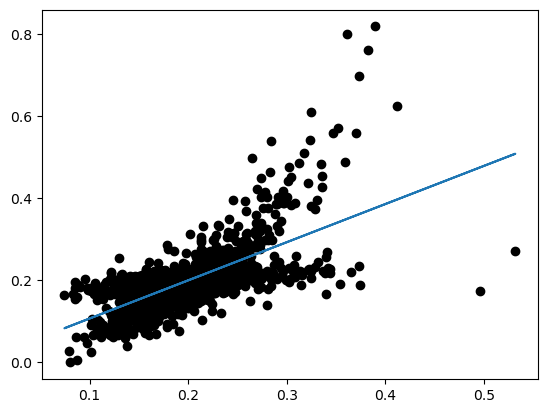

m is  0.9304201791143967


In [833]:
## NN train graph
nn_pred_y = model_nn(torch.Tensor(x))

plt.scatter(nn_pred_y.detach().numpy(), y, c='k')
a = nn_pred_y.detach().numpy()
m, b = np.polyfit(a[:,0], y, 1)
plt.plot(a[:,0], m*a[:,0] + b)
#그래프 출력
plt.show()
print("m is ", m)

In [834]:
for model in models:
    model.fit(x, y)
    pre = model.predict(x)
    loss_value = mse_loss(pre, y)
    
    print(model, loss_value)

LinearRegression() 0.003079990422201933
DecisionTreeRegressor(criterion='mse', max_depth=20, random_state=0) 1.177347742240794e-06


D:\ProgramData\Anaconda3\envs\torch_kaggle_midterm\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


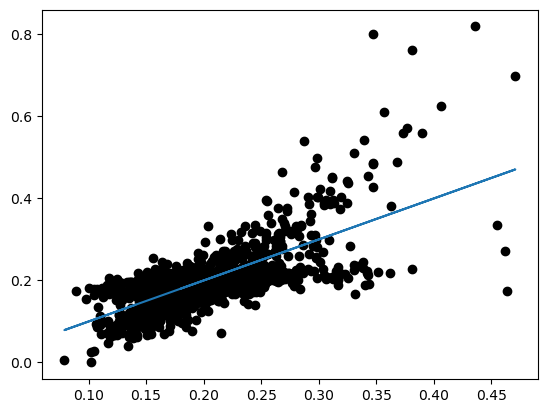

m is  0.9999999999999984


In [835]:
##models = [model_lr] train graph
plt.scatter(model_lr.predict(x), y, c='k')
a = model_lr.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

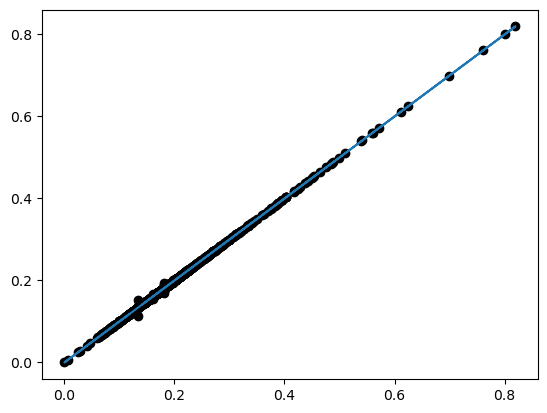

m is  1.0000000000000002


In [836]:
##models = [model_lr,model_dt] train graph
plt.scatter(model_dt.predict(x), y, c='k')

a = model_dt.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

In [845]:
## valdiate
##x1 = val_data[:, 0:24]
##x2 = val_data[:, 25:167]
##x = np.concatenate((x1,x2), axis=1)
x = val_data[:, 0:41]
y = val_data[:, 41]

print(x.shape, y.shape)

(865, 41) (865,)


In [846]:
for model in models:
    pre = model.predict(x)   
    loss_value = mse_loss(pre, y)

In [847]:
print("w:", model_lr.coef_, ", b:", model_lr.intercept_)

w: [-0.0377284   0.34098573  0.00595053  0.00529728 -0.00065517  0.06301423
  0.03676765  0.03241874 -0.00980726 -0.05012454  0.04067314  0.02310074
  0.06485737 -0.0133368  -0.02255749 -0.02731304 -0.01048224 -0.01005561
 -0.08272704 -0.00502501 -0.00760795  0.00234004 -0.07757207  0.01155541
  0.15702563  0.01392102  0.01715551 -0.00665526  0.01685106 -0.0215259
  0.07712884  0.02250008 -0.00881581 -0.00769613 -0.00982858  0.01993732
  0.0288906   0.01345408 -0.00285062  0.01259357 -0.0003505 ] , b: 0.1019615685509318


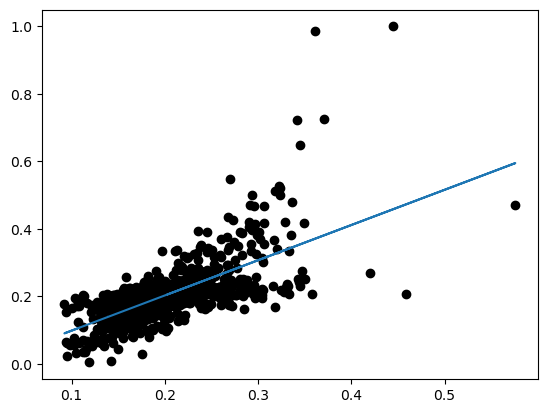

m is  1.0435683822013537


In [848]:
##models = [model_lr] validation graph
plt.scatter(model_lr.predict(x), y, c='k')
a = model_lr.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

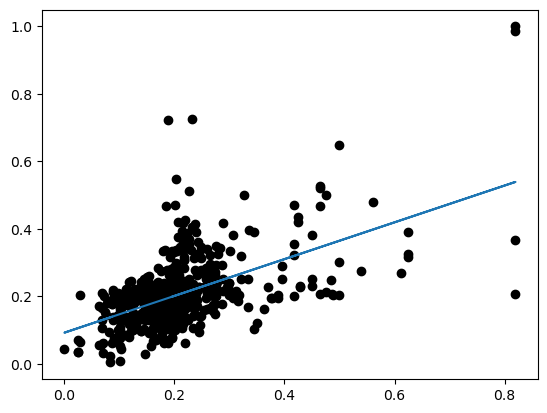

m is  0.5450819279952464


In [849]:
##models = [model_lr,model_dt] validation graph
plt.scatter(model_dt.predict(x), y, c='k')

a = model_dt.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

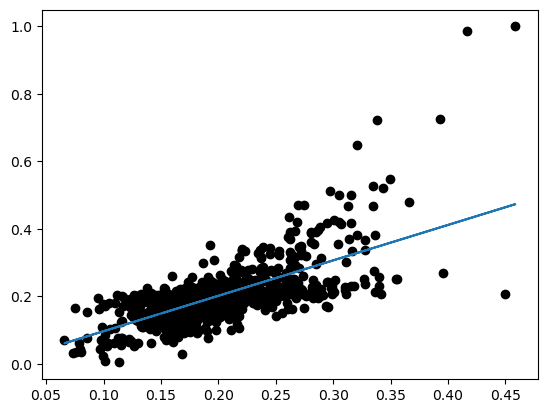

m is  1.0501409227391632


In [850]:
## NN validation graph
nn_pred_y = model_nn(torch.Tensor(x))

plt.scatter(nn_pred_y.detach().numpy(), y, c='k')
a = nn_pred_y.detach().numpy()
m, b = np.polyfit(a[:,0], y, 1)
plt.plot(a[:,0], m*a[:,0] + b)
#그래프 출력
plt.show()
print("m is ", m)

---

## Performance

In [851]:
## codes

## test
##x1 = test_data[:, 0:24]
##x2 = test_data[:, 25:167]
##x = np.concatenate((x1,x2), axis=1)
x = test_data[:, 0:41]
y = test_data[:, 41]

print(x.shape, y.shape)

(865, 41) (865,)


In [852]:
## test LinearR, DTR
for model in models:
    pre = model.predict(x)   
    loss_value = mse_loss(pre, y)
    
    print(model, loss_value)

LinearRegression() 0.0031202468790002187
DecisionTreeRegressor(criterion='mse', max_depth=20, random_state=0) 0.006691310633973497


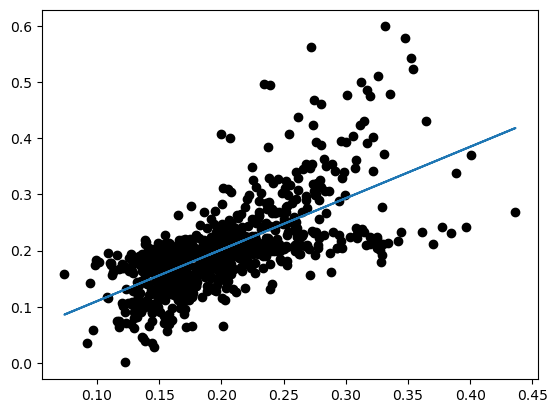

m is  0.9167061877690417


In [853]:
##models = [model_lr] test graph
plt.scatter(model_lr.predict(x), y, c='k')
a = model_lr.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

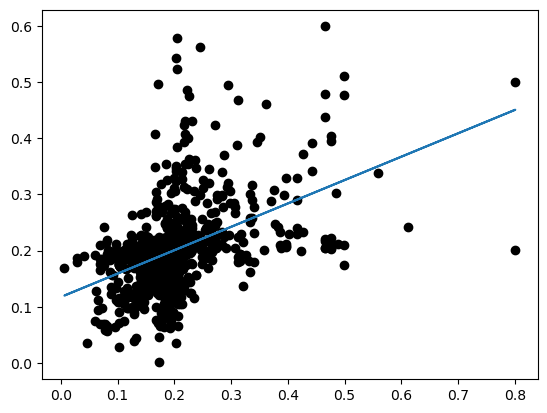

m is  0.4166074718243319


In [854]:
##models = [model_dt] test graph
plt.scatter(model_dt.predict(x), y, c='k')

a = model_dt.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

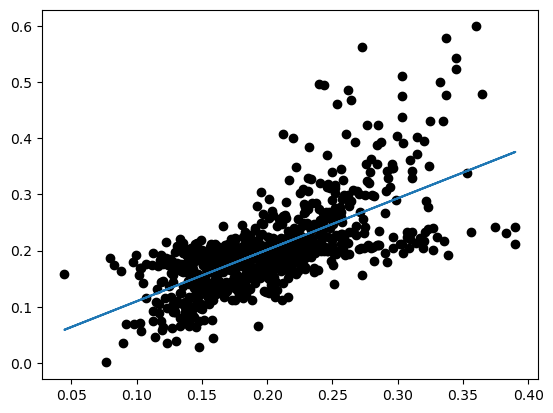

m is  0.9180744211177688


In [855]:
## NN test graph
nn_pred_y = model_nn(torch.Tensor(x))

plt.scatter(nn_pred_y.detach().numpy(), y, c='k')
a = nn_pred_y.detach().numpy()
m, b = np.polyfit(a[:,0], y, 1)
plt.plot(a[:,0], m*a[:,0] + b)
#그래프 출력
plt.show()
print("m is ", m)

In [951]:
data_dummy

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0000
1,20,RL,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0000
2,60,RL,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0000
3,70,RL,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0000
4,60,RL,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,...,0,NA,NA,NA,0,6,2006,WD,Normal,167081.2209
2915,160,RM,1894,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,...,0,NA,NA,NA,0,4,2006,WD,Abnorml,164788.7782
2916,20,RL,20000,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,...,0,NA,NA,NA,0,9,2006,WD,Abnorml,219222.4234
2917,85,RL,10441,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,...,0,NA,MnPrv,Shed,700,7,2006,WD,Normal,184924.2797


## image by OsyTheDataGuy
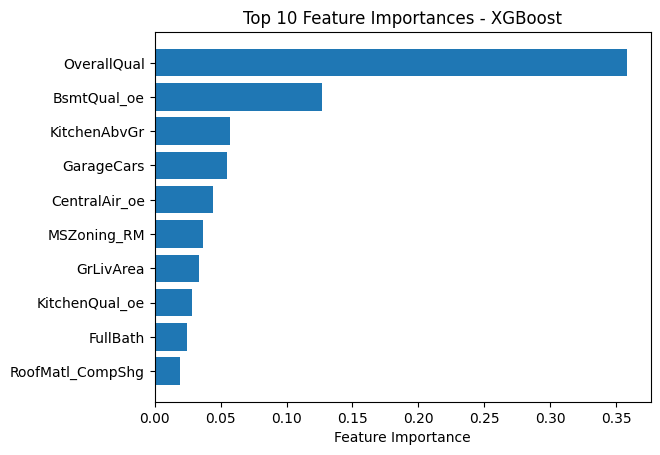


In [972]:
sbset=['OverallQual', 'BsmtQual', 'KitchenAbvGr', 'GarageCars', 'CentralAir', 'MSZoning', 'GrLivArea', 'KitchenQual', 'FullBath', 'RoofMatl', 'SalePrice']

new_data = data_dummy[sbset]

In [973]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2882 entries, 0 to 2918
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   2882 non-null   int64  
 1   BsmtQual      2882 non-null   object 
 2   KitchenAbvGr  2882 non-null   int64  
 3   GarageCars    2882 non-null   float64
 4   CentralAir    2882 non-null   object 
 5   MSZoning      2882 non-null   object 
 6   GrLivArea     2882 non-null   int64  
 7   KitchenQual   2882 non-null   object 
 8   FullBath      2882 non-null   int64  
 9   RoofMatl      2882 non-null   object 
 10  SalePrice     2882 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 270.2+ KB
None


In [974]:
## min-max scaler
for i in new_data.columns:
    if new_data[i].dtypes != "object":
            min_x = new_data[i]-new_data[i].min()
            min_max = new_data[i].max()-new_data[i].min()
            new_data[i] = min_x / min_max

D:\ProgramData\Anaconda3\envs\torch_kaggle_midterm\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [975]:
new_data

,OverallQual,BsmtQual,KitchenAbvGr,GarageCars,CentralAir,MSZoning,GrLivArea,KitchenQual,FullBath,RoofMatl,SalePrice
0,0.666667,Gd,0.333333,0.4,Y,RL,0.259231,Gd,0.50,CompShg,0.241078
1,0.555556,Gd,0.333333,0.4,Y,RL,0.174830,TA,0.50,CompShg,0.203583
2,0.666667,Gd,0.333333,0.4,Y,RL,0.273549,Gd,0.50,CompShg,0.261908
3,0.666667,TA,0.333333,0.6,Y,RL,0.260550,Gd,0.25,CompShg,0.145952
4,0.777778,Gd,0.333333,0.6,Y,RL,0.351168,Gd,0.50,CompShg,0.298709
...,...,...,...,...,...,...,...,...,...,...,...
2914,0.333333,TA,0.333333,0.0,Y,RM,0.142803,TA,0.25,CompShg,0.183560
2915,0.333333,TA,0.333333,0.2,Y,RM,0.142803,TA,0.25,CompShg,0.180376
2916,0.444444,TA,0.333333,0.4,Y,RL,0.167671,TA,0.25,CompShg,0.255968
2917,0.444444,Gd,0.333333,0.0,Y,RL,0.119819,TA,0.25,CompShg,0.208338


In [976]:
##one hot encoder object type data
##categorical-data can change 0, 1, 2(Label Encoding) ... or [0, 0, 1, 0 0](One hot Encoding). Label Encoding that has more than 3 class 
##effect the result cause of numbers. so Choose One hot Encoding.
##all categorical data encoding
onehot_data = pd.get_dummies(data=new_data, columns=new_data.select_dtypes(include = ["object"]).columns)
onehot_data.head()

,OverallQual,KitchenAbvGr,GarageCars,GrLivArea,FullBath,SalePrice,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,...,KitchenQual_Gd,KitchenQual_TA,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,0.666667,0.333333,0.4,0.259231,0.50,0.241078,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0.555556,0.333333,0.4,0.174830,0.50,0.203583,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2,0.666667,0.333333,0.4,0.273549,0.50,0.261908,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
3,0.666667,0.333333,0.6,0.260550,0.25,0.145952,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0.777778,0.333333,0.6,0.351168,0.50,0.298709,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


In [977]:
tt_data = onehot_data[onehot_data.columns].values

train_data = tt_data[train_idxs]
val_data = tt_data[val_idxs]
test_data = tt_data[test_idxs]

In [986]:
## target columns check
for i in range(0, 30):
    if "SalePrice" == onehot_data.columns[i]:
           print(i)

5


In [988]:
## codes
## LinearR, DTR 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [989]:
model_lr = LinearRegression(fit_intercept=True) # Loss function is fixed to MSE.

In [990]:
model_dt = DecisionTreeRegressor(#criterion='squared_error', # latest version {“squared_error”, “absolute_error”, ...}
                                 criterion='mse', # v=0.24 {“mse”, “mae”, ...}
                                 splitter='best', # {“best”, “random”}
                                 max_depth=10,
                                 random_state=0)

In [991]:
## Neural Network
import torch
import torch.nn as nn
import torch.optim as optim


In [992]:
## 56 weight Network
input_n = nn.Linear(29, 15, bias= True)
output_n = nn.Linear(15, 1, bias = True)

model_nn=nn.Sequential(input_n,output_n)
model_nn

Sequential(
  (0): Linear(in_features=29, out_features=15, bias=True)
  (1): Linear(in_features=15, out_features=1, bias=True)
)

In [993]:
## loss function
loss = nn.MSELoss()
optimizer = optim.SGD(model_nn.parameters(), lr=0.0001)

### Train Model & Select Model

In [994]:
## codes
models = [model_lr,model_dt]

In [995]:
def mse_loss(pre, y):
    return ((pre-y)**2).mean()

In [996]:
x1 = train_data[:, 0:5]
x2 = train_data[:, 6:30]
x = np.concatenate((x1,x2), axis=1)
y = train_data[:, 5]

print(x.shape, y.shape)

(1152, 29) (1152,)


In [997]:
for step in range(500000):
    pre = model_nn(torch.Tensor(x))
    cost = loss(pre, torch.Tensor(y).unsqueeze(1))
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if step % 100000 ==0:
        print(f'Epoch {step}:{cost.item()}')

Epoch 0:0.027966823428869247
Epoch 100000:0.005064822267740965
Epoch 200000:0.004586208611726761
Epoch 300000:0.004359904211014509
Epoch 400000:0.004211629740893841


In [998]:
import matplotlib.pyplot as plt
%matplotlib inline

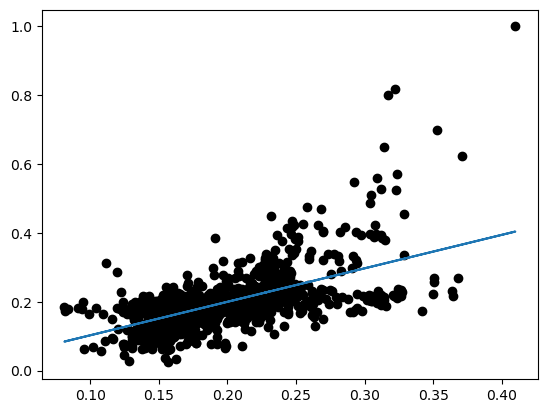

m is  0.9730000384935805


In [999]:
## NN train graph
nn_pred_y = model_nn(torch.Tensor(x))

plt.scatter(nn_pred_y.detach().numpy(), y, c='k')
a = nn_pred_y.detach().numpy()
m, b = np.polyfit(a[:,0], y, 1)
plt.plot(a[:,0], m*a[:,0] + b)
#그래프 출력
plt.show()
print("m is ", m)

In [1000]:
for model in models:
    model.fit(x, y)
    pre = model.predict(x)
    loss_value = mse_loss(pre, y)
    
    print(model, loss_value)

LinearRegression() 0.0031280436310398164
DecisionTreeRegressor(criterion='mse', max_depth=10, random_state=0) 0.0012427228154494362


D:\ProgramData\Anaconda3\envs\torch_kaggle_midterm\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


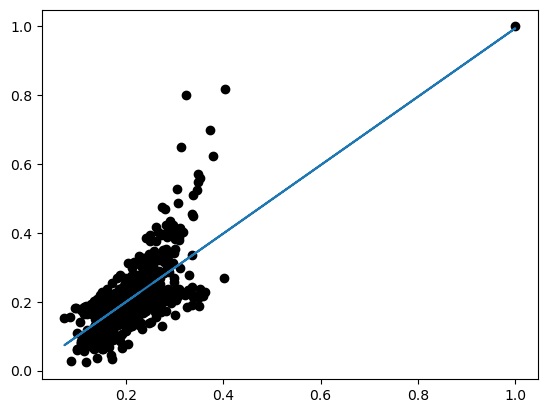

m is  0.9924764927349548


In [1001]:
##models = [model_lr] train graph
plt.scatter(model_lr.predict(x), y, c='k')
a = model_lr.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

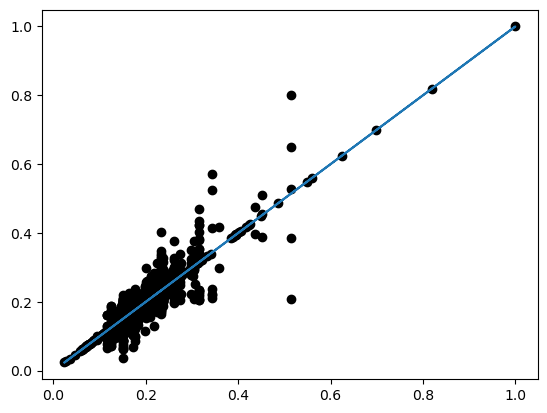

m is  1.0


In [1002]:
##models = [model_lr,model_dt] train graph
plt.scatter(model_dt.predict(x), y, c='k')

a = model_dt.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

In [1003]:
## valdiate

x1 = val_data[:, 0:5]
x2 = val_data[:, 6:30]
x = np.concatenate((x1,x2), axis=1)
y = val_data[:, 5]

print(x.shape, y.shape)

(865, 29) (865,)


In [1004]:
for model in models:
    pre = model.predict(x)   
    loss_value = mse_loss(pre, y)

In [1005]:
print("w:", model_lr.coef_, ", b:", model_lr.intercept_)

w: [ 3.38390983e-02 -8.26191764e-02  2.59512114e-02  3.92359767e-01
 -3.39325051e-03 -1.42099967e+12 -1.42099967e+12 -1.42099967e+12
 -1.42099967e+12 -1.42099967e+12  3.59703753e+11  3.59703753e+11
 -3.12799158e+11 -3.12799158e+11 -3.12799158e+11 -3.12799158e+11
 -3.12799158e+11 -8.71830551e+11 -8.71830551e+11 -8.71830551e+11
 -8.71830551e+11  2.96622238e+10  2.96622238e+10  2.96622238e+10
  2.96622238e+10  0.00000000e+00  2.96622238e+10  2.96622238e+10
  2.96622238e+10] , b: 2216263398663.056


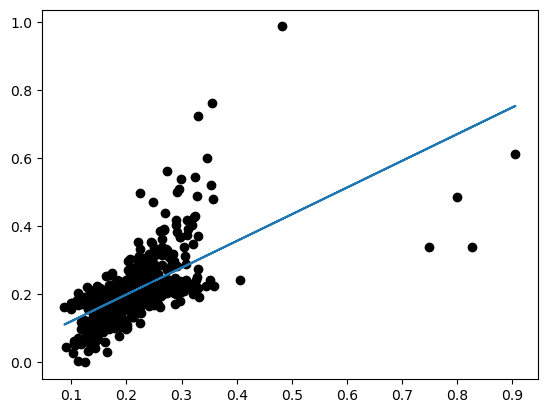

m is  0.7845506502314269


In [1006]:
##models = [model_lr] validation graph
plt.scatter(model_lr.predict(x), y, c='k')
a = model_lr.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

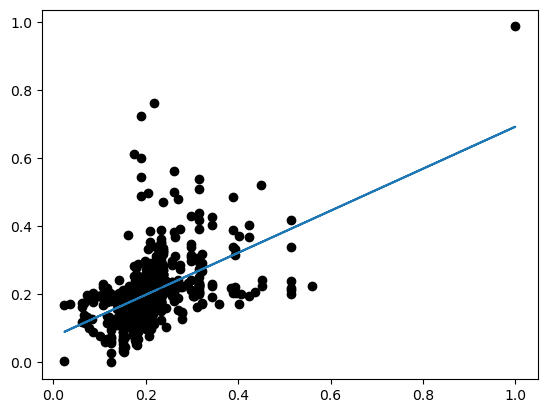

m is  0.6165673275109793


In [1007]:
##models = [model_lr,model_dt] validation graph
plt.scatter(model_dt.predict(x), y, c='k')

a = model_dt.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

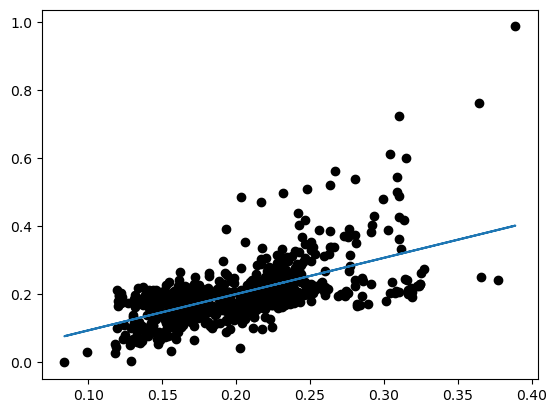

m is  1.0639634698414207


In [1008]:
## NN validation graph
nn_pred_y = model_nn(torch.Tensor(x))

plt.scatter(nn_pred_y.detach().numpy(), y, c='k')
a = nn_pred_y.detach().numpy()
m, b = np.polyfit(a[:,0], y, 1)
plt.plot(a[:,0], m*a[:,0] + b)
#그래프 출력
plt.show()
print("m is ", m)

In [1009]:
## codes

## test

x1 = test_data[:, 0:5]
x2 = test_data[:, 6:30]
x = np.concatenate((x1,x2), axis=1)
y = test_data[:, 5]


print(x.shape, y.shape)

(865, 29) (865,)


In [1010]:
## test LinearR, DTR
for model in models:
    pre = model.predict(x)   
    loss_value = mse_loss(pre, y)
    
    print(model, loss_value)

LinearRegression() 1.0171647610898894e+18
DecisionTreeRegressor(criterion='mse', max_depth=10, random_state=0) 0.006328560362795673


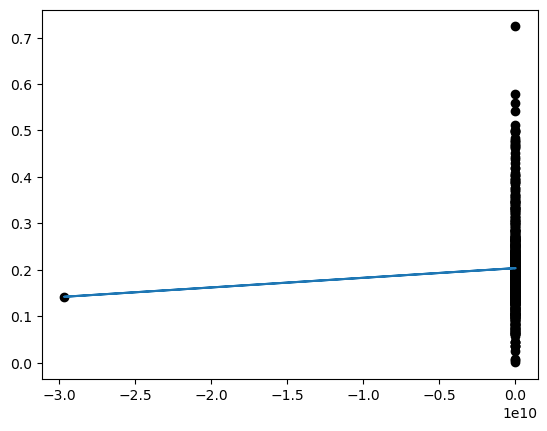

m is  2.0783643701046035e-12


In [1011]:
##models = [model_lr] test graph
plt.scatter(model_lr.predict(x), y, c='k')
a = model_lr.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

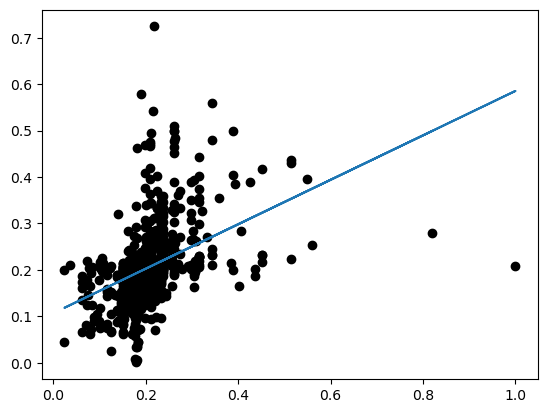

m is  0.47847815493219664


In [1012]:
##models = [model_dt] test graph
plt.scatter(model_dt.predict(x), y, c='k')

a = model_dt.predict(x)
m, b = np.polyfit(a, y, 1)
plt.plot(a, m*a + b)

#그래프 출력
plt.show()
print("m is ", m)

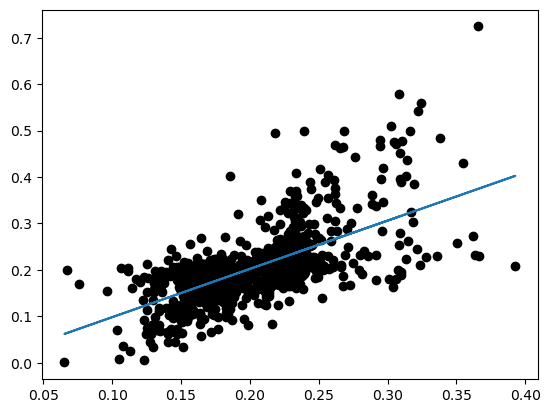

m is  1.0396578161431271


In [1013]:
## NN test graph
nn_pred_y = model_nn(torch.Tensor(x))

plt.scatter(nn_pred_y.detach().numpy(), y, c='k')
a = nn_pred_y.detach().numpy()
m, b = np.polyfit(a[:,0], y, 1)
plt.plot(a[:,0], m*a[:,0] + b)
#그래프 출력
plt.show()
print("m is ", m)